In [173]:
!pip install statsbombpy --quiet
!pip install mplsoccer --quiet

## Imports

In [174]:
from statsbombpy import sb
import mplsoccer as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

## Encodage des couleurs pour les heatmap

## Exploration de la base de donnée

Statsbomb est une entreprise qui fournit des données de matchs de foot, ils ont une librairie python qui permet d'avoir toutes les données sur toutes les compétitions et les matchs (https://github.com/statsbomb/statsbombpy et https://statsbomb.com/fr/). Voici comment on peut l'utiliser :

In [175]:
#Montrer  les compétitions

sb.competitions()

competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
69              55         43         Europe               UEFA Euro   
70              35         75         Europe      UEFA Europa League   
71              53        106         Europe       UEFA Women's Euro   
72              72        107  International       Women's World Cup   
73              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                       True   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
69               male              False                       True   
70               male              False                      False   
71             female              False                       True   
72             female              False                       True   
73             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2023/2024  2024-07-15T14:15:54.671676  2024-07-15T14:17:00.877356   
1    2015/2016  2024-05-19T11:11:14.192381                        None   
2         2023  2024-06-13T07:51:02.452825                        None   
3    2018/2019  2024-06-12T07:44:38.559714     2021-06-13T16:17:31.694   
4    2017/2018  2024-02-13T02:35:28.134882     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
69        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   
70   1988/1989  2024-02-12T14:45:05.702250     2021-06-13T16:17:31.694   
71        2022  2024-02-13T13:27:17.178263  2024-02-13T13:30:52.820588   
72        2023  2024-07-14T16:59:48.469596  2024-07-14T17:01:38.887279   
73        2019  2024-02-13T09:41:26.379767     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0   2024-07-15T14:17:00.877356  2024-07-15T14:15:54.671676  
1                         None  2024-05-19T11:11:14.192381  
2                         None  2024-06-13T07:51:02.452825  
3                         None  2024-06-12T07:44:38.559714  
4                         None  2024-02-13T02:35:28.134882  
..                         ...                         ...  
69  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402  
70                        None  2024-02-12T14:45:05.702250  
71  2024-02-13T13:30:52.820588  2024-02-13T13:27:17.178263  
72  2024-07-14T17:01:38.887279  2024-07-14T16:59:48.469596  
73                        None  2024-02-13T09:41:26.379767  

[74 rows x 12 columns]

In [176]:
# Montrer les matchs d'une compétition pour une certaines saison

competition_id = 43
season_id = 3

matches = sb.matches(competition_id=competition_id, season_id=season_id)

In [177]:
matches

match_id  match_date      kick_off                     competition season  \
0       7585  2018-07-03  20:00:00.000  International - FIFA World Cup   2018   
1       7570  2018-06-28  20:00:00.000  International - FIFA World Cup   2018   
2       7586  2018-07-03  16:00:00.000  International - FIFA World Cup   2018   
3       7557  2018-06-25  20:00:00.000  International - FIFA World Cup   2018   
4       7542  2018-06-20  14:00:00.000  International - FIFA World Cup   2018   
..       ...         ...           ...                             ...    ...   
59      7540  2018-06-19  20:00:00.000  International - FIFA World Cup   2018   
60      8652  2018-07-07  20:00:00.000  International - FIFA World Cup   2018   
61      7563  2018-06-26  16:00:00.000  International - FIFA World Cup   2018   
62      7556  2018-06-24  17:00:00.000  International - FIFA World Cup   2018   
63      7559  2018-06-25  16:00:00.000  International - FIFA World Cup   2018   

       home_team    away_team  home_score  away_score match_status  ...  \
0       Colombia      England           1           1    available  ...   
1        England      Belgium           0           1    available  ...   
2         Sweden  Switzerland           1           0    available  ...   
3           Iran     Portugal           1           1    available  ...   
4       Portugal      Morocco           1           0    available  ...   
..           ...          ...         ...         ...          ...  ...   
59        Russia        Egypt           3           1    available  ...   
60        Russia      Croatia           2           2    available  ...   
61       Denmark       France           0           0    available  ...   
62         Japan      Senegal           2           2    available  ...   
63  Saudi Arabia        Egypt           2           1    available  ...   

           last_updated_360 match_week competition_stage  \
0   2021-06-13T16:17:31.694          4       Round of 16   
1   2021-06-13T16:17:31.694          3       Group Stage   
2   2021-06-13T16:17:31.694          4       Round of 16   
3   2021-06-13T16:17:31.694          3       Group Stage   
4   2021-06-13T16:17:31.694          2       Group Stage   
..                      ...        ...               ...   
59  2021-06-13T16:17:31.694          2       Group Stage   
60  2021-06-13T16:17:31.694          5    Quarter-finals   
61  2021-06-13T16:17:31.694          3       Group Stage   
62  2021-06-13T16:17:31.694          2       Group Stage   
63  2021-06-13T16:17:31.694          3       Group Stage   

                         stadium                        referee  \
0            Otkritie Bank Arena                    Mark Geiger   
1            Stadion Kaliningrad                  Damir Skomina   
2       Saint-Petersburg Stadium                  Damir Skomina   
3                 Mordovia Arena                Enrique Cáceres   
4               Stadion Luzhniki                    Mark Geiger   
..                           ...                            ...   
59      Saint-Petersburg Stadium                Enrique Cáceres   
60  \tOlimpiyskiy Stadion Fisht                    Sandro Ricci   
61              Stadion Luzhniki                   Sandro Ricci   
62          \tEkaterinburg Arena                Gianluca Rocchi   
63               Volgograd Arena  Wilmar Alexander Roldán Pérez   

                                home_managers  \
0                        José Néstor Pekerman   
1                            Gareth Southgate   
2                          Jan Olof Andersson   
3            Carlos Manuel Brito Leal Queiróz   
4   Fernando Manuel Fernandes da Costa Santos   
..                                        ...   
59                       Stanislav Cherchesov   
60                       Stanislav Cherchesov   
61                       Åge Fridtjof Hareide   
62                              Akira Nishino   
63                 Juan Antonio Pizzi Torroja   

               

In [178]:
#Les différentes variables
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               64 non-null     int64 
 1   match_date             64 non-null     object
 2   kick_off               64 non-null     object
 3   competition            64 non-null     object
 4   season                 64 non-null     object
 5   home_team              64 non-null     object
 6   away_team              64 non-null     object
 7   home_score             64 non-null     int64 
 8   away_score             64 non-null     int64 
 9   match_status           64 non-null     object
 10  match_status_360       64 non-null     object
 11  last_updated           64 non-null     object
 12  last_updated_360       64 non-null     object
 13  match_week             64 non-null     int64 
 14  competition_stage      64 non-null     object
 15  stadium                64

Nous avons également une base de données des évenements pour chaque match, essayons de trouver les données pour la finale de la coupe du monde 2018.

In [179]:
final = matches[matches['competition_stage'] == "Final"].iloc[0]
match_id = final.loc['match_id']

events = sb.events(match_id = match_id)
events

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
0                     NaN                            NaN              NaN   
1                     NaN                            NaN              NaN   
2                     NaN                            NaN              NaN   
3                     NaN                            NaN              NaN   
4                     NaN                            NaN              NaN   
...                   ...                            ...              ...   
2973                  NaN                            NaN              NaN   
2974                  NaN                            NaN              NaN   
2975                  NaN                            NaN              NaN   
2976                  NaN                            NaN              NaN   
2977                  NaN                            NaN              NaN   

     carry_end_location clearance_aerial_won counterpress dribble_outcome  \
0                   NaN                  NaN          NaN             NaN   
1                   NaN                  NaN          NaN             NaN   
2                   NaN                  NaN          NaN             NaN   
3                   NaN                  NaN          NaN             NaN   
4                   NaN                  NaN          NaN             NaN   
...                 ...                  ...          ...             ...   
2973                NaN                  NaN          NaN             NaN   
2974                NaN                  NaN          NaN             NaN   
2975                NaN                  NaN          NaN             NaN   
2976                NaN                  NaN          NaN             NaN   
2977                NaN                  NaN          NaN             NaN   

     dribble_overrun duel_outcome duel_type  ...  shot_statsbomb_xg  \
0                NaN          NaN       NaN  ...                NaN   
1                NaN          NaN       NaN  ...                NaN   
2                NaN          NaN       NaN  ...                NaN   
3                NaN          NaN       NaN  ...                NaN   
4                NaN          NaN       NaN  ...                NaN   
...              ...          ...       ...  ...                ...   
2973             NaN          NaN       NaN  ...                NaN   
2974             NaN          NaN       NaN  ...                NaN   
2975             NaN          NaN       NaN  ...                NaN   
2976             NaN          NaN       NaN  ...                NaN   
2977             NaN          NaN       NaN  ...                NaN   

     shot_technique shot_type substitution_outcome substitution_replacement  \
0               NaN       NaN                  NaN                      NaN   
1               NaN       NaN                  NaN                      NaN   
2               NaN       NaN                  NaN                      NaN   
3               NaN       NaN                  NaN                      NaN   
4               NaN       NaN                  NaN                      NaN   
...             ...       ...                  ...                      ...   
2973            NaN       NaN             Tactical         Corentin Tolisso   
2974            NaN       NaN             Tactical              Marko Pjaca   
2975            NaN       NaN             Tactical              Nabil Fekir   
2976            NaN       NaN                  NaN                      NaN   
2977            NaN       NaN                  NaN                      NaN   

                                                tactics     team  \
0     {'formation': 442, 'lineup': [{'player': {'id'...   France   
1     {'formation': 433, 'lineup': [{'player': {'id'...  Croatia   
2                                                   NaN   France   
3                                                   NaN  Croatia   
4            

In [180]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ball_receipt_outcome            97 non-null     object 
 1   ball_recovery_recovery_failure  6 non-null      object 
 2   block_deflection                2 non-null      object 
 3   carry_end_location              617 non-null    object 
 4   clearance_aerial_won            2 non-null      object 
 5   counterpress                    106 non-null    object 
 6   dribble_outcome                 28 non-null     object 
 7   dribble_overrun                 2 non-null      object 
 8   duel_outcome                    37 non-null     object 
 9   duel_type                       53 non-null     object 
 10  duration                        2231 non-null   float64
 11  foul_committed_advantage        2 non-null      object 
 12  foul_committed_card             2 

On voit qu'il y a quand même beaucoup de données, essayons d'en analyser et d'en afficher quelques unes.

### Analyses des passes

Analysons les passes de Mbappe

In [ ]:
passes_mbappe = events[(events['type'] == "Pass") &
                (events['player'] == "Kylian Mbappé Lottin")]
passes_mbappe.head(5)

ball_receipt_outcome ball_recovery_recovery_failure block_deflection  \
45                   NaN                            NaN              NaN   
49                   NaN                            NaN              NaN   
185                  NaN                            NaN              NaN   
186                  NaN                            NaN              NaN   
198                  NaN                            NaN              NaN   

    carry_end_location clearance_aerial_won counterpress dribble_outcome  \
45                 NaN                  NaN          NaN             NaN   
49                 NaN                  NaN          NaN             NaN   
185                NaN                  NaN          NaN             NaN   
186                NaN                  NaN          NaN             NaN   
198                NaN                  NaN          NaN             NaN   

    dribble_overrun duel_outcome duel_type  ...  shot_statsbomb_xg  \
45              NaN          NaN       NaN  ...                NaN   
49              NaN          NaN       NaN  ...                NaN   
185             NaN          NaN       NaN  ...                NaN   
186             NaN          NaN       NaN  ...                NaN   
198             NaN          NaN       NaN  ...                NaN   

    shot_technique shot_type substitution_outcome substitution_replacement  \
45             NaN       NaN                  NaN                      NaN   
49             NaN       NaN                  NaN                      NaN   
185            NaN       NaN                  NaN                      NaN   
186            NaN       NaN                  NaN                      NaN   
198            NaN       NaN                  NaN                      NaN   

    tactics    team     timestamp  type under_pressure  
45      NaN  France  00:02:42.747  Pass            NaN  
49      NaN  France  00:03:19.787  Pass            NaN  
185     NaN  France  00:15:54.147  Pass           True  
186     NaN  France  00:15:56.787  Pass            NaN  
198     NaN  France  00:16:40.027  Pass            NaN  

[5 rows x 75 columns]

On créé une base avec uniquement les coordonnées de départ et d'arrivées des passes de Griezmann pour pouvoir les afficher.

In [ ]:
coordinates = passes_mbappe[['location', 'pass_end_location']]

x1, y1 = np.array(coordinates['location'].tolist()).T
x2, y2 = np.array(coordinates['pass_end_location'].tolist()).T

Nous pouvons maintenant afficher ça, grâce à mpl qui est une bibliothèque spécialement créé pour l'analyse des matchs de foot (https://mplsoccer.readthedocs.io/en/latest/)

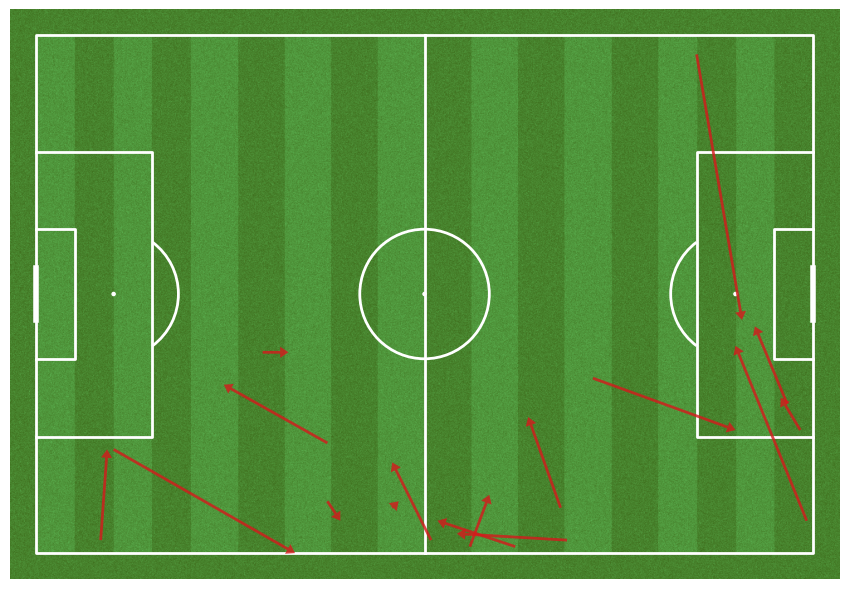

In [ ]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))

p = pitch.arrows(x1, y1, x2, y2, alpha=0.8, color=red,
                 headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax)

Faisons la même chose avec les tirs

### Analyse des tirs

In [184]:
shots = events[(events['type'] == "Shot") &
               (events['team'] == "France") ]

In [185]:
x, y = np.array(shots['location'].tolist()).T
xg = np.array(shots['shot_statsbomb_xg'].tolist())
goal = [red if g == "Goal" else 'black' for g in shots['shot_outcome'].to_list()]

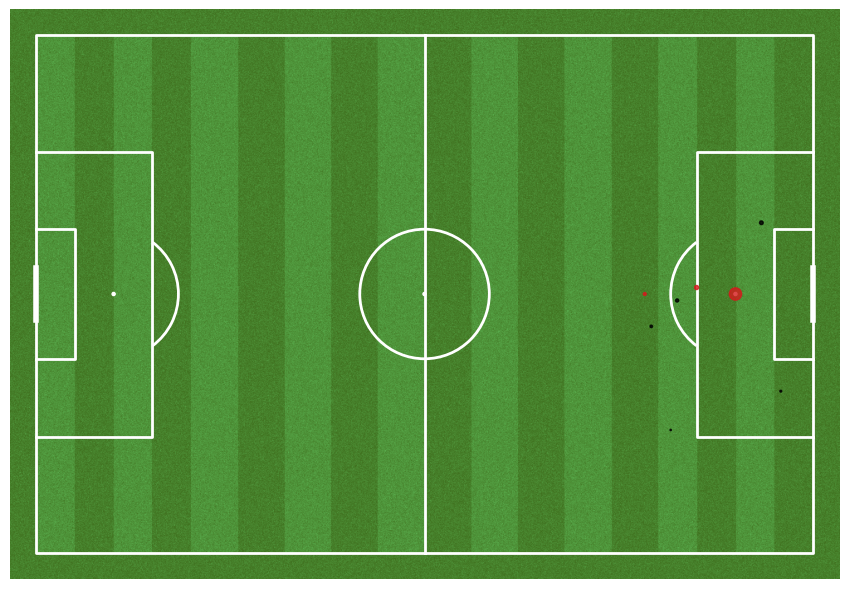

In [186]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.scatter(x, y, s=xg*100, c=goal, alpha=0.8, ax=ax)

In [187]:
shots = events[(events['type'] == "Shot") &
               (events['team'] == "Croatia") ]

In [188]:
x, y = np.array(shots['location'].tolist()).T
xg = np.array(shots['shot_statsbomb_xg'].tolist())
goal = [red if g == "Goal" else 'black' for g in shots['shot_outcome'].to_list()]

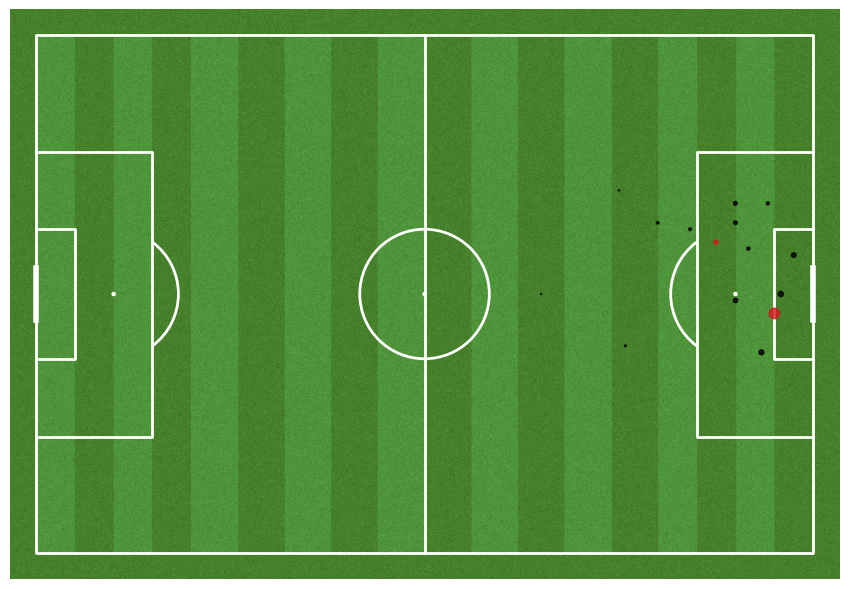

In [189]:
pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.scatter(x, y, s=xg*100, c=goal, alpha=0.8, ax=ax)

Jusqu'à maintenant on a analysé des événements factuels pour comparer, la on va essayer de "moyenner" tout ça et avoir une analyse plus gloale du match, pour savoir sur quelles parties du terrain se sont passées le plus de choses, on va donc faire ce qu'on appelle uen heatmap, par exemple sur le joueur Modric 

### Analyse en heatmap

In [190]:
arg_events = events[~pd.isna(events['location']) &
                    (events['player'] == "Luka Modrić")]

In [191]:
x, y = np.array(arg_events['location'].tolist()).T

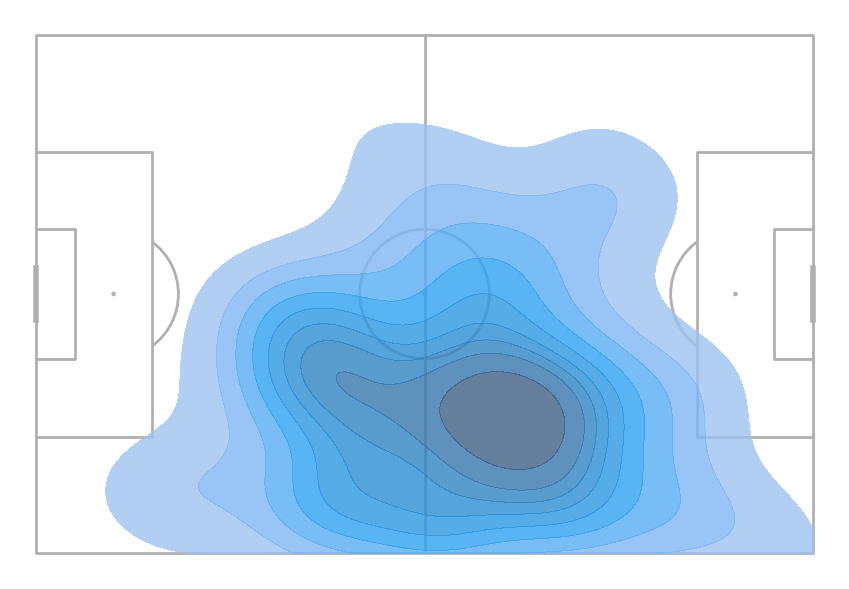

In [192]:
pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
k = pitch.kdeplot(x, y, fill=True, levels=10, alpha=0.8, ax=ax)

## Clustering

Alors maintenant qu'on a fait un premier travail d'analyse des données, on va pouvoir commencer à faire des modélisations. Une modélisation intéressante est le "clustering", la création de "groupes" de données qui se ressemble. L'idée globale est qu'on va séparer les données qu'on a dans différents clusters et on aura un "centroïde" qui correspond a la donnée moyenne de ce groupe. C'est ce qu'on appelle de l'apprentissage non supervisé xcar on a pas de label, et ça peut être intéressant pour connaitre et analyser le jeu global d'une équipe ou d'un joueur par IA.

In [193]:
#Transformer le df en dict
matches_ = matches.to_dict(orient='records')

#Decider le nb de matchs
n_matches = 15

#Créer les df avec les coordonnées des passes
all_events = []
for m in tqdm(matches_[0:n_matches]):
    events = sb.events(match_id = m['match_id'])
    passes = events[(events['type'] == "Pass")]
    coordinates = passes[['location', 'pass_end_location']]
    x1, y1 = np.array(coordinates['location'].tolist()).T
    x2, y2 = np.array(coordinates['pass_end_location'].tolist()).T
    coords = np.vstack((x1, y1, x2, y2)).T
    all_events.extend(coords)

100%|██████████| 15/15 [00:37<00:00,  2.49s/it]


Ca nous donne un grand dataframe avec toutes les coordonnées de passes sur les matchs qu'on a choisi, mais on pourrait filtrer différemment.

In [194]:
df = pd.DataFrame(all_events, columns=['x1', 'y1', 'x2', 'y2'])
df.head(3)

x1    y1    x2    y2
0  60.0  40.0  50.0  41.0
1  51.0  40.0  47.0  54.0
2  49.0  55.0  65.0  79.0

On va maintenant faire notre clustering, avec l'algorithme des k-means, on a juste à charger le modèle, spécifier combien de clusters on veut et le fit sur nos données.

In [195]:
from sklearn.cluster import KMeans

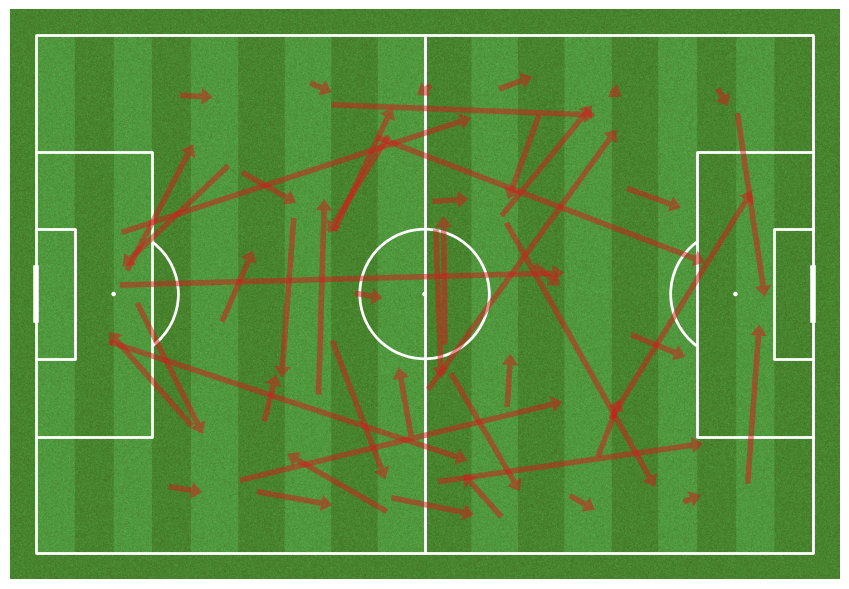

In [196]:
#Avec 50 cluster
model = KMeans(n_clusters=50)
features = df[['x1', 'y1', 'x2', 'y2']]
fit = model.fit(features)

pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
for coords in fit.cluster_centers_:
  p = pitch.arrows(*coords, alpha=0.5, color=red, ax=ax,
                   headaxislength=2, headlength=2, headwidth=3, width=4)

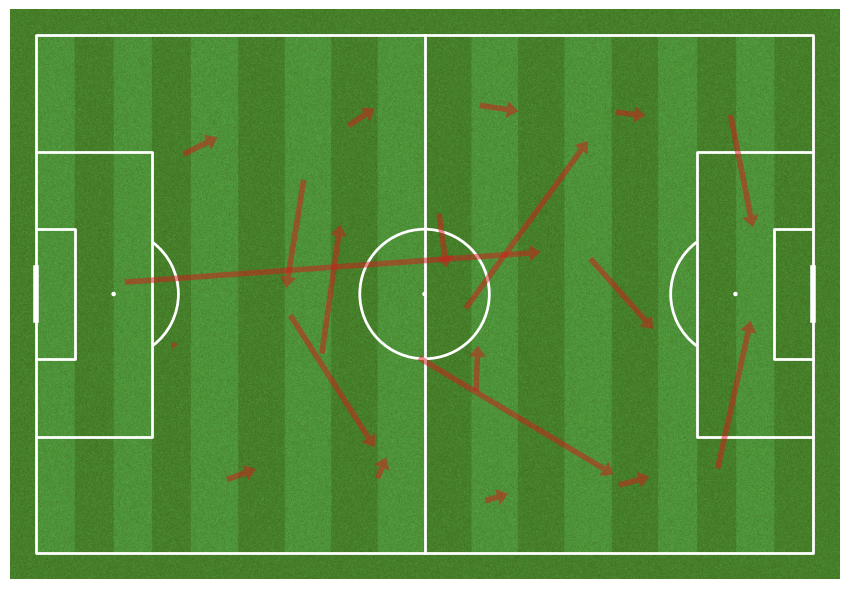

In [197]:
#Avec 20 cluster
model = KMeans(n_clusters=20)
features = df[['x1', 'y1', 'x2', 'y2']]
fit = model.fit(features)

pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
for coords in fit.cluster_centers_:
  p = pitch.arrows(*coords, alpha=0.5, color=red, ax=ax,
                   headaxislength=2, headlength=2, headwidth=3, width=4)

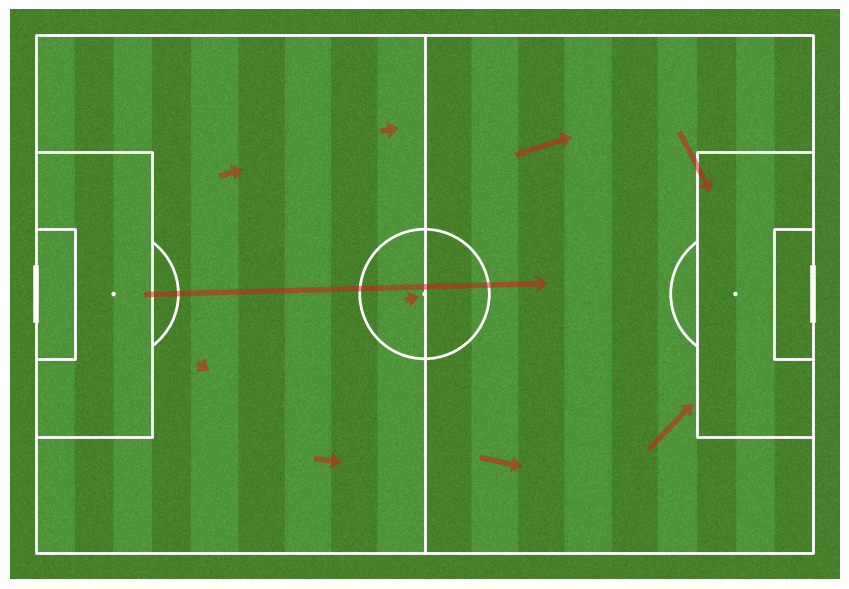

In [198]:
#Avec 10 cluster
model = KMeans(n_clusters=10)
features = df[['x1', 'y1', 'x2', 'y2']]
fit = model.fit(features)

pitch = mpl.Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(9, 6))
for coords in fit.cluster_centers_:
  p = pitch.arrows(*coords, alpha=0.5, color=red, ax=ax,
                   headaxislength=2, headlength=2, headwidth=3, width=4)

On voit le type de passes les plus faites en fonction de ce qui est dans notre base de donnée et de la granularité qu'on veut.

## Apprentissage supervisé

Maintenant qu'on a fait ça, on peut s'intéresser au machine learning ou apprentissage supervisé, on peut par exemple imaginer un modèle qui s'entraine sur les données d'une équipe ou d'un joueur en particulier, pour analyser si une passe ser réussie ou non, ou si un but sera mis ou non lors d'un tir, pour ensuite regarder quelles sont les spécifictés qui font que le but est marqué ou non, par IA, pour nous donner des insights différents de ceux de l'humain.

On a besoin de beaucoup de données, on va prendre toutes les passes de la coupe du monde 2022

### Sur les passes

In [199]:
all_events = []

for m in tqdm(matches_):
    events = sb.events(match_id = m['match_id'])
    passes = events[(events['type'] == "Pass")]
    x1, y1 = np.array(passes['location'].tolist()).T
    x2, y2 = np.array(passes['pass_end_location'].tolist()).T
    outcome = np.array(
        [1 if pd.isna(o) else 0 for o in passes['pass_outcome'].values]).T
    evs = np.vstack((x1, y1, x2, y2, outcome)).T
    all_events.extend(evs)

100%|██████████| 64/64 [02:26<00:00,  2.28s/it]


On va utiliser le modèle de machine learning qui a le plus fait ses preuves et le plus connu : XGBoost. Je vais pas rentrer en détail dans le fonctionnement de l'algo mais l'idée est toujours la même, séparer le jeu de donnée en un set d'entrainement et de test, regarder les données qu'on a et regarder si la passe est réussie ou non, pour pouvoir prédire si une passe va être réussie ou non. Ici, comme ce qui est proposé dans le github, je vais utiliser seulement les coordonnées de départ et d'arriver des passes.

In [200]:
df = pd.DataFrame(all_events, columns=['x1', 'y1', 'x2', 'y2', 'outcome'])

X = df[['x1', 'y1', 'x2', 'y2']]
y = df['outcome']

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [202]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=0)
fit = model.fit(X_train, y_train)

In [203]:
#Prediction de l'output en proba ou en valeur discrete
y_probs_train = model.predict_proba(X_train)[:, 1]
y_probs_test = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

Pour évaluer les performances de notre modèle, on utilise différentes métriques, l'accuracy, la precision et le rappel. Voici une explication : https://inside-machinelearning.com/recall-precision-f1-score/

On voit qu'on a pas spécialement de bonnes performances en rappel sur la classe 0, cela veut dire que parfois le modèle ne va pas détecter une mauvaise passe et va penser qu'elle a été réussie.

In [204]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.50      0.59      2520
         1.0       0.88      0.95      0.91     10057

    accuracy                           0.86     12577
   macro avg       0.79      0.72      0.75     12577
weighted avg       0.85      0.86      0.85     12577



Une autre manière d'évaluer le modèle est avec les roc curve (https://fr.mathworks.com/discovery/roc-curve.html#:~:text=Les%20courbes%20ROC%20(fonctions%20d,compos%C3%A9e%20de%20deux%20classes%20distinctes.) L'idée globale est que l'on veut étudie le taux de vrais positifs par rapport aux faux postifs. Plus l'aire sous la courbe est proche de 1, plus le modèle est bon.

Comme on peut l'imaginer, les résultats sont meilleurs sur le set d'entrainement, mais on a quand même de bons résultats en général

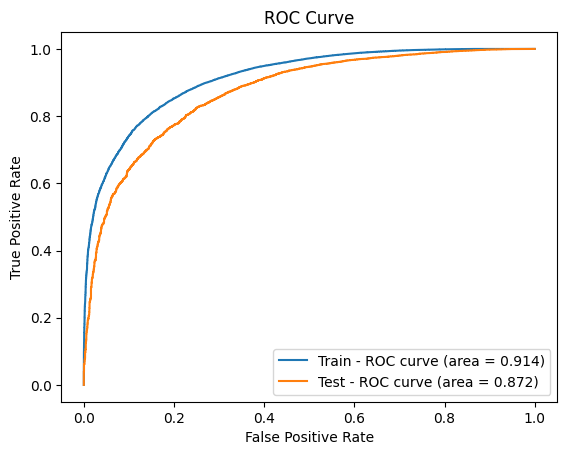

In [205]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_probs_test)

plt.plot(fpr, tpr, label='Train - ROC curve (area = {:.3f})'.format(auc_train))
plt.plot(fpr_, tpr_, label='Test - ROC curve (area = {:.3f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Nous pouvons maintenant visualiser certaines des passes et les prédicitions faites. On voit que les passes vers l'arriere sont les plus probabkes de réussir, tandis que les passes longues, les passes/centres devant le but ou les corners ont plus de chance d'être ratées.

C:\Users\alexa\AppData\Local\Temp\ipykernel_16804\2790681054.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm_r')


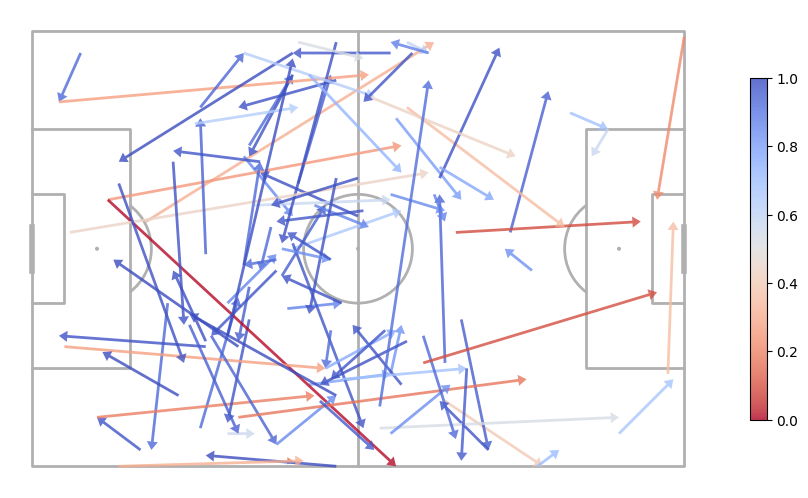

In [206]:
import matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm_r')

y_probs = model.predict_proba(df[['x1', 'y1', 'x2', 'y2']])[:, 1]
df['difficulty'] = y_probs

coords = df[['x1', 'y1', 'x2', 'y2']].values[100:200].T
colors = cmap(df['difficulty'].values[100:200])

pitch = mpl.Pitch()
fig, ax = pitch.draw(figsize=(9, 6))
p = pitch.arrows(*coords, alpha=0.8, cmap='coolwarm_r', color=colors,
                  headaxislength=3, headlength=3, headwidth=4, width=2, ax=ax)
plt.colorbar(p, shrink=0.6)

On va maintenant essayer d'aller un peu plus loin que le github est de mettre d'autres types de données sur les passes dans notre modélisations.

In [208]:
column_names = [
    "location",
    "pass_aerial_won",
    "pass_angle",
    "pass_body_part",
    "pass_cross",
    "pass_end_location",
    "pass_height",
    "pass_length",
    "pass_outcome",
    "pass_switch",
    "pass_type"
]

passes_list = []

for m in tqdm(matches_):
    events = sb.events(match_id=m['match_id'])
    passes = events[events['type'] == "Pass"][column_names]
    passes_list.append(passes)

passes_df_0 = pd.concat(passes_list, ignore_index=True)

100%|██████████| 64/64 [02:21<00:00,  2.22s/it]


In [209]:
passes_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62881 entries, 0 to 62880
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           62881 non-null  object 
 1   pass_aerial_won    1022 non-null   object 
 2   pass_angle         62881 non-null  float64
 3   pass_body_part     59654 non-null  object 
 4   pass_cross         1685 non-null   object 
 5   pass_end_location  62881 non-null  object 
 6   pass_height        62881 non-null  object 
 7   pass_length        62881 non-null  float64
 8   pass_outcome       12714 non-null  object 
 9   pass_switch        2033 non-null   object 
 10  pass_type          11260 non-null  object 
dtypes: float64(2), object(9)
memory usage: 5.3+ MB


In [210]:
#On ne garde que les colonnes avec assez de données
passes_df = passes_df_0[['location', 'pass_angle', 'pass_body_part', 'pass_end_location', 'pass_height', 'pass_length', 'pass_outcome', 'pass_type']]

In [211]:
passes_df

location  pass_angle pass_body_part pass_end_location  \
0       [60.0, 40.0]    3.041924      Left Foot      [50.0, 41.0]   
1       [51.0, 40.0]    1.849096      Left Foot      [47.0, 54.0]   
2       [49.0, 55.0]    0.982794     Right Foot      [65.0, 79.0]   
3       [66.0, 78.0]   -0.564569     Right Foot      [96.0, 59.0]   
4       [25.0, 22.0]   -1.234122           Head       [32.0, 2.0]   
...              ...         ...            ...               ...   
62876   [96.0, 58.0]    0.528074     Right Foot     [108.0, 65.0]   
62877  [108.0, 65.0]   -0.643501     Right Foot     [116.0, 59.0]   
62878  [112.0, 68.0]   -1.756144     Right Foot     [109.0, 52.0]   
62879  [107.0, 53.0]    0.000000     Right Foot     [115.0, 53.0]   
62880   [61.0, 41.0]   -2.961739      Left Foot      [50.0, 39.0]   

       pass_height  pass_length pass_outcome pass_type  
0      Ground Pass    10.049875          NaN  Kick Off  
1      Ground Pass    14.560220          NaN       NaN  
2      Ground Pass    28.844410          NaN       NaN  
3        High Pass    35.510563   Incomplete       NaN  
4        High Pass    21.189621          NaN  Recovery  
...            ...          ...          ...       ...  
62876  Ground Pass    13.892444          NaN       NaN  
62877  Ground Pass    10.000000          NaN       NaN  
62878  Ground Pass    16.278820          NaN  Recovery  
62879     Low Pass     8.000000          NaN       NaN  
62880  Ground Pass    11.180340          NaN  Kick Off  

[62881 rows x 8 columns]

In [212]:
#On créé la variable cible et on travaille sur les colonnes de coordonnées
passes_df['outcome'] = np.array([1 if pd.isna(o) else 0 for o in passes_df['pass_outcome'].values]).T
passes_df['x1'] = passes_df['location'].apply(lambda loc: loc[0])
passes_df['y1'] = passes_df['location'].apply(lambda loc: loc[1])
passes_df['x2'] = passes_df['pass_end_location'].apply(lambda loc: loc[0])
passes_df['y2'] = passes_df['pass_end_location'].apply(lambda loc: loc[1])

passes_df = passes_df.drop('pass_outcome', axis=1)
passes_df = passes_df.drop('location', axis = 1)
passes_df = passes_df.drop('pass_end_location', axis = 1)

C:\Users\alexa\AppData\Local\Temp\ipykernel_16804\4179248357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_df['outcome'] = np.array([1 if pd.isna(o) else 0 for o in passes_df['pass_outcome'].values]).T
C:\Users\alexa\AppData\Local\Temp\ipykernel_16804\4179248357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes_df['x1'] = passes_df['location'].apply(lambda loc: loc[0])


In [213]:
#on vire les données manquantes
passes_df = passes_df.dropna()

In [214]:
passes_df

pass_angle pass_body_part  pass_height  pass_length  pass_type  \
0        3.041924      Left Foot  Ground Pass    10.049875   Kick Off   
4       -1.234122           Head    High Pass    21.189621   Recovery   
32      -1.140104     Right Foot  Ground Pass    40.718548   Recovery   
43      -2.356194     Right Foot  Ground Pass     8.485281   Recovery   
51       1.458069     Right Foot    High Pass    53.338543  Free Kick   
...           ...            ...          ...          ...        ...   
62817    0.092047     Right Foot    High Pass    65.276340   Recovery   
62833   -2.098871      Left Foot  Ground Pass    13.892444   Recovery   
62835    2.312744      Left Foot     Low Pass    16.278820   Recovery   
62878   -1.756144     Right Foot  Ground Pass    16.278820   Recovery   
62880   -2.961739      Left Foot  Ground Pass    11.180340   Kick Off   

       outcome     x1    y1     x2    y2  
0            1   60.0  40.0   50.0  41.0  
4            1   25.0  22.0   32.0   2.0  
32           0   48.0  43.0   65.0   6.0  
43           1   27.0  69.0   21.0  63.0  
51           1   67.0  19.0   73.0  72.0  
...        ...    ...   ...    ...   ...  
62817        0    4.0  74.0   69.0  80.0  
62833        1    9.0  61.0    2.0  49.0  
62835        1   57.0  27.0   46.0  39.0  
62878        1  112.0  68.0  109.0  52.0  
62880        1   61.0  41.0   50.0  39.0  

[8428 rows x 10 columns]

In [215]:
#On encode les variables catégorielles
passes_df = pd.get_dummies(passes_df)

In [216]:
passes_df

pass_angle  pass_length  outcome     x1    y1     x2    y2  \
0        3.041924    10.049875        1   60.0  40.0   50.0  41.0   
4       -1.234122    21.189621        1   25.0  22.0   32.0   2.0   
32      -1.140104    40.718548        0   48.0  43.0   65.0   6.0   
43      -2.356194     8.485281        1   27.0  69.0   21.0  63.0   
51       1.458069    53.338543        1   67.0  19.0   73.0  72.0   
...           ...          ...      ...    ...   ...    ...   ...   
62817    0.092047    65.276340        0    4.0  74.0   69.0  80.0   
62833   -2.098871    13.892444        1    9.0  61.0    2.0  49.0   
62835    2.312744    16.278820        1   57.0  27.0   46.0  39.0   
62878   -1.756144    16.278820        1  112.0  68.0  109.0  52.0   
62880   -2.961739    11.180340        1   61.0  41.0   50.0  39.0   

       pass_body_part_Head  pass_body_part_Left Foot  pass_body_part_Other  \
0                    False                      True                 False   
4                     True                     False                 False   
32                   False                     False                 False   
43                   False                     False                 False   
51                   False                     False                 False   
...                    ...                       ...                   ...   
62817                False                     False                 False   
62833                False                      True                 False   
62835                False                      True                 False   
62878                False                     False                 False   
62880                False                      True                 False   

       pass_body_part_Right Foot  pass_height_Ground Pass  \
0                          False                     True   
4                          False                    False   
32                          True                     True   
43                          True                     True   
51                          True                    False   
...                          ...                      ...   
62817                       True                    False   
62833                      False                     True   
62835                      False                    False   
62878                       True                     True   
62880                      False                     True   

       pass_height_High Pass  pass_height_Low Pass  pass_type_Corner  \
0                      False                 False             False   
4                       True                 False             False   
32                     False                 False             False   
43                     False                 False             False   
51                      True                 False             False   
...                      ...                   ...               ...   
62817                   True                 False             False   
62833                  False                 False             False   
62835                  False                  True             False   
62878                  False                 False             False   
62880                  False                 False             False   

       pass_type_Free Kick  pass_type_Goal Kick  pass_type_Interception  \
0                    False                False                   False   
4                    False                False                   False   
32                   False                False                   False   
43                   False                False                   False   
51                    True                False                   False   
...                    ...                  ...                     ...   
62817                False                False                   False   
62833                False                F

In [217]:
#Et on fait l'entrainement

X = passes_df.drop("outcome", axis=1)
y = passes_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = xgb.XGBClassifier(random_state=0)
fit = model.fit(X_train, y_train)

In [218]:
#Prediction de l'output en proba ou en valeur discrete
y_probs_train = model.predict_proba(X_train)[:, 1]
y_probs_test = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       620
           1       0.80      0.81      0.81      1066

    accuracy                           0.75      1686
   macro avg       0.73      0.73      0.73      1686
weighted avg       0.75      0.75      0.75      1686



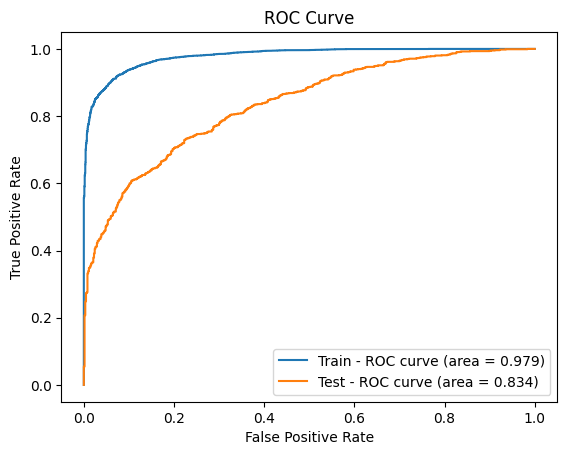

In [220]:
auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_probs_test)

plt.plot(fpr, tpr, label='Train - ROC curve (area = {:.3f})'.format(auc_train))
plt.plot(fpr_, tpr_, label='Test - ROC curve (area = {:.3f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

On voit qu'on a quand même de bien meilleurs résultats avec les données supplémentaires.

On peut étudier l'importance des différents features, c'est pour l'explicabilité des modèles.

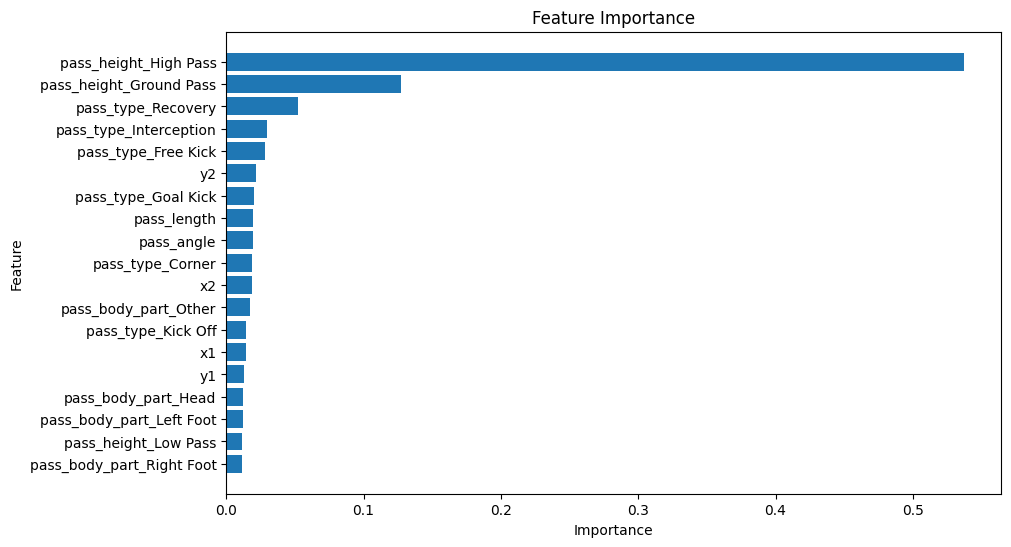

In [221]:
feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

import matplotlib.pyplot as plt

# Tracer un graphe montrant l'importance des fonctionnalités
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les fonctionnalités les plus importantes en haut
plt.show()


### Sur les tirs

Faisons maintenant le même travail pour les tirs

In [222]:
column_names = [
    "location",
    "shot_body_part",
    "shot_end_location",
    "shot_first_time",
    "shot_freeze_frame",
    "shot_key_pass_id",
    "shot_outcome",
    "shot_statsbomb_xg",
    "shot_technique",
    "shot_type"
]
shots_list = []

for m in tqdm(matches_):
    events = sb.events(match_id=m['match_id'])
    shots = events[events['type'] == "Shot"][column_names]
    shots_list.append(shots)

shots_df_0 = pd.concat(shots_list, ignore_index=True)

100%|██████████| 64/64 [03:04<00:00,  2.88s/it]


In [223]:
shots_df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           1706 non-null   object 
 1   shot_body_part     1706 non-null   object 
 2   shot_end_location  1706 non-null   object 
 3   shot_first_time    357 non-null    object 
 4   shot_freeze_frame  1638 non-null   object 
 5   shot_key_pass_id   1180 non-null   object 
 6   shot_outcome       1706 non-null   object 
 7   shot_statsbomb_xg  1706 non-null   float64
 8   shot_technique     1706 non-null   object 
 9   shot_type          1706 non-null   object 
dtypes: float64(1), object(9)
memory usage: 133.4+ KB


On a beaucoup moins de données, travaillons quand même sur celles-ci mais il faudrait prendre plus de matchs

In [224]:
shots_df = shots_df_0[['location', 'shot_body_part', 'shot_end_location', 'shot_outcome', 'shot_statsbomb_xg', 'shot_technique', 'shot_type']]

In [225]:
shots_df

location shot_body_part   shot_end_location shot_outcome  \
0     [115.0, 18.0]     Right Foot  [120.0, 42.2, 2.0]        Saved   
1     [112.0, 54.0]     Right Foot       [113.0, 53.0]      Blocked   
2      [98.0, 37.0]     Right Foot       [105.0, 37.0]      Blocked   
3     [119.0, 36.0]           Head  [120.0, 40.5, 3.1]        Off T   
4      [97.0, 56.0]     Right Foot       [100.0, 54.0]      Blocked   
...             ...            ...                 ...          ...   
1701  [102.0, 22.0]     Right Foot       [112.0, 36.0]      Blocked   
1702   [95.0, 30.0]     Right Foot       [104.0, 32.0]      Blocked   
1703  [116.0, 30.0]     Right Foot  [119.0, 36.8, 0.8]        Saved   
1704  [101.0, 58.0]     Right Foot       [106.0, 52.0]      Blocked   
1705  [116.0, 53.0]     Right Foot  [120.0, 36.4, 0.4]         Goal   

      shot_statsbomb_xg shot_technique  shot_type  
0              0.009816         Normal  Free Kick  
1              0.038204         Normal  Open Play  
2              0.045128         Normal  Open Play  
3              0.625074         Normal  Open Play  
4              0.021760         Normal  Open Play  
...                 ...            ...        ...  
1701           0.028970         Normal  Open Play  
1702           0.065623         Normal  Free Kick  
1703           0.088908         Volley  Open Play  
1704           0.020325         Normal  Open Play  
1705           0.021029    Half Volley  Open Play  

[1706 rows x 7 columns]

In [226]:
shots_df['outcome'] = shots_df['shot_outcome'].apply(lambda x: 1 if x == 'Goal' else 0)
shots_df['x1'] = shots_df['location'].apply(lambda loc: loc[0])
shots_df['y1'] = shots_df['location'].apply(lambda loc: loc[1])
shots_df['x2'] = shots_df['shot_end_location'].apply(lambda loc: loc[0])
shots_df['y2'] = shots_df['shot_end_location'].apply(lambda loc: loc[1])

shots_df = shots_df.drop('location', axis = 1)
shots_df = shots_df.drop('shot_end_location', axis = 1)
shots_df = shots_df.drop('shot_outcome', axis = 1)

C:\Users\alexa\AppData\Local\Temp\ipykernel_16804\1145277718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['outcome'] = shots_df['shot_outcome'].apply(lambda x: 1 if x == 'Goal' else 0)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16804\1145277718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df['x1'] = shots_df['location'].apply(lambda loc: loc[0])


In [227]:
shots_df = pd.get_dummies(shots_df)

In [228]:
shots_df

shot_statsbomb_xg  outcome     x1    y1     x2    y2  \
0              0.009816        0  115.0  18.0  120.0  42.2   
1              0.038204        0  112.0  54.0  113.0  53.0   
2              0.045128        0   98.0  37.0  105.0  37.0   
3              0.625074        0  119.0  36.0  120.0  40.5   
4              0.021760        0   97.0  56.0  100.0  54.0   
...                 ...      ...    ...   ...    ...   ...   
1701           0.028970        0  102.0  22.0  112.0  36.0   
1702           0.065623        0   95.0  30.0  104.0  32.0   
1703           0.088908        0  116.0  30.0  119.0  36.8   
1704           0.020325        0  101.0  58.0  106.0  52.0   
1705           0.021029        1  116.0  53.0  120.0  36.4   

      shot_body_part_Head  shot_body_part_Left Foot  shot_body_part_Other  \
0                   False                     False                 False   
1                   False                     False                 False   
2                   False                     False                 False   
3                    True                     False                 False   
4                   False                     False                 False   
...                   ...                       ...                   ...   
1701                False                     False                 False   
1702                False                     False                 False   
1703                False                     False                 False   
1704                False                     False                 False   
1705                False                     False                 False   

      shot_body_part_Right Foot  shot_technique_Backheel  \
0                          True                    False   
1                          True                    False   
2                          True                    False   
3                         False                    False   
4                          True                    False   
...                         ...                      ...   
1701                       True                    False   
1702                       True                    False   
1703                       True                    False   
1704                       True                    False   
1705                       True                    False   

      shot_technique_Diving Header  shot_technique_Half Volley  \
0                            False                       False   
1                            False                       False   
2                            False                       False   
3                            False                       False   
4                            False                       False   
...                            ...                         ...   
1701                         False                       False   
1702                         False                       False   
1703                         False                       False   
1704                         False                       False   
1705                         False                        True   

      shot_technique_Lob  shot_technique_Normal  shot_technique_Overhead Kick  \
0                  False                   True                         False   
1                  False                   True                         False   
2                  False                   True                         False   
3                  False                   True                         False   
4                  False                   True                         False   
...                  ...                    ...                           ...   
1701               False                   True                         False   
1702               False                   True                         False   
1703               False                  False                         False   
1704        

In [229]:
X = shots_df.drop("outcome", axis=1)
y = shots_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = xgb.XGBClassifier(random_state=0)
fit = model.fit(X_train, y_train)

In [230]:
#Prediction de l'output en proba ou en valeur discrete
y_probs_train = model.predict_proba(X_train)[:, 1]
y_probs_test = model.predict_proba(X_test)[:, 1]

y_pred = model.predict(X_test)

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       305
           1       0.79      0.62      0.70        37

    accuracy                           0.94       342
   macro avg       0.87      0.80      0.83       342
weighted avg       0.94      0.94      0.94       342



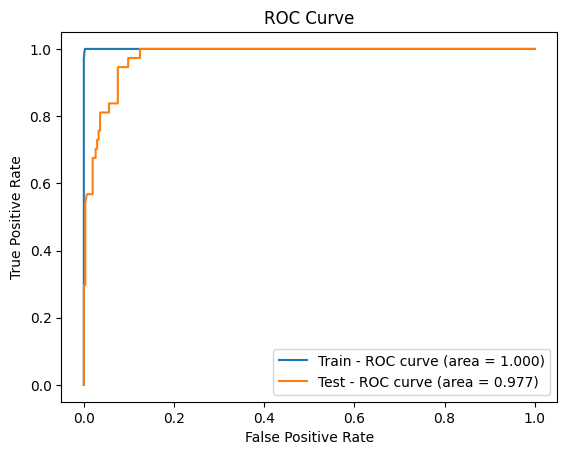

In [232]:
auc_train = roc_auc_score(y_train, y_probs_train)
auc_test = roc_auc_score(y_test, y_probs_test)

fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_probs_test)

plt.plot(fpr, tpr, label='Train - ROC curve (area = {:.3f})'.format(auc_train))
plt.plot(fpr_, tpr_, label='Test - ROC curve (area = {:.3f})'.format(auc_test))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

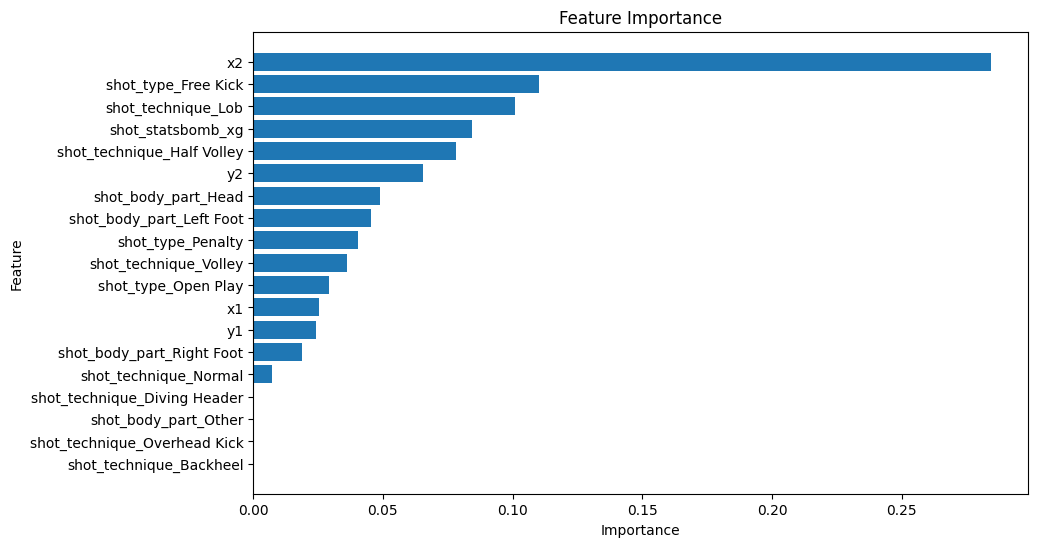

In [233]:
feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

import matplotlib.pyplot as plt

# Tracer un graphe montrant l'importance des fonctionnalités
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les fonctionnalités les plus importantes en haut
plt.show()
